# Lecture 13 Assignment
## *NumPy* Calculus
___

- *Python*, and the many modules available for it, can do much more than can be covered in a one semester class
- Many of the basics have been covered which...
  - Should allow you to use *Python* to solve engineering related problems in the future
  - Give you a good understanding of how programming works

- The topics covered here include...
  - Adding, subtracting, multiplying, and dividing polynomials
  - Derivatives and integrals of polynomials
  - Polynomial curve fitting
  - Finding roots of polynomials
  - Finding zeros and local minimums and maximums of functions
  - Numeric integration
  - Numeric differentiation
- Each of these topics will be introduced by using a number of examples
- This is not an exhaustive investigation of these topics, but merely an introduction

**Execute the following code cell to import the necessary modules for this notebook**

In [1]:
import numpy as np
from scipy import integrate, optimize

Import the *NumPy* polynomial module with the following command. This will allow us to use function calls like `P.polyadd()` instead of having to use the entire path to the module.

In [2]:
from numpy.polynomial import polynomial as P

**Create polynomials**

Use *Python* lists to define two polynomials `p1` and `p2` per the following expressions. Watch for any missing (zero) coefficients and use the correct order of coefficients ($x^0$ is first).

$p_1 = -40 + 15x -3x^2 -10x^3 + 15x^5 + 3x^6$

$p_2 = -6 -2x +3x^3$

In [3]:
# define 'p1' using a list
p1 = [-40, 15, -3, -10, 0, 15, 3]

In [4]:
# define 'p2' using a list
p2 = [-6, -2, 0, 3]

**Polynomial math functions**

Use the appropriate polynomial functions to add, substract, multiply, and divide polynomials $p_1$ and $p_2$ per the following:

1. $p_1 + p_2$

2. $p_1 - p_2$

3. $p_1 \times p_2$

4. $p_1 \div p_2$

In [5]:
# add the polynomials
P.polyadd(p1, p2)

array([-46.,  13.,  -3.,  -7.,   0.,  15.,   3.])

In [6]:
# subtract p2 from p1
P.polysub(p1, p2)

array([-34.,  17.,  -3., -13.,   0.,  15.,   3.])

In [7]:
# multiply the polynomials
P.polymul(p1, p2)

array([240., -10., -12., -54.,  65., -99., -78.,  -6.,  45.,   9.])

In [8]:
# divide p2 from p1
P.polydiv(p1, p2)

(array([2.        , 0.66666667, 5.        , 1.        ]),
 array([-28.        ,  23.        ,  28.33333333]))

**Polynomial division**

Define two polynomials $u = -5 + 7x +8x^2 + 3x^3$ and $v = 3 + x$ in the following code cell. Then divide $u$ by $v$ using `P.polydiv()`. Polynomial division returns two values; quotient and remainder. Assign the quotient to `q` and the remainder to `r`. Recall that this can be done by putting `q` and `r` in a tuple on the left side of the equal sign. Print both the quotient and remainder in the same cell (code is provided). Then in the last cell, multiply the quotient `q` times `v` and add the remainder `r`. What did you get for an answer?

In [9]:
# define u and v
u = [-5, 7, 8, 3]
v = [3, 1]

In [10]:
# divide u by v and assign results to q and r
q, r = P.polydiv(u, v)

In [11]:
print('q =', q)
print('r =', r)

q = [10. -1.  3.]
r = [-35.]


In [12]:
# multiply q and v then add r
P.polyadd(P.polymul(q, v), r)

array([-5.,  7.,  8.,  3.])

**Using `P.polyval(x, p)`**

Find the value of $p_1$ at $x=3$ and the values of $p_1$ at $x = 0, 1, 2, \ldots, 10$ in the following code cells. Use a range of values for the second one.

In [13]:
# value of p1 at 3
P.polyval(3, p1)

5540.0

In [14]:
# value of p1 at 0, 1, 2,..., 10
P.polyval(np.arange(11), p1)

array([-4.00000e+01, -2.00000e+01,  5.70000e+02,  5.54000e+03,
        2.69800e+04,  9.24600e+04,  2.54390e+05,  6.01540e+05,
        1.27272e+06,  2.47262e+06,  4.48981e+06])

**Derivatives and integrals of polynomials**

Execute the following code cell to create polynomial `p`. Use the remaining cells to find the first and second derivatives of `p` and to integrate `p`.

In [15]:
# 10 - 4x + 2x^2
p = [10, -4, 2]

In [16]:
# first derivative of p
P.polyder(p)

array([-4.,  4.])

In [17]:
# second derivative of p
P.polyder(p, 2)

array([4.])

In [18]:
# first integral of p
P.polyint(p)

array([ 0.        , 10.        , -2.        ,  0.66666667])

**Curve fitting**

Execute the following three code cells to create $x$ and $y$ values to use for fitting and to plot them as red dots.

In [19]:
import matplotlib.pyplot as plt

In [20]:
x = np.arange(0, 5.5, 0.5)
y = np.array([6.0, 4.83, 3.70, 3.15, 2.41, 1.83, 1.49, 1.21, 0.96, 0.73, 0.64])

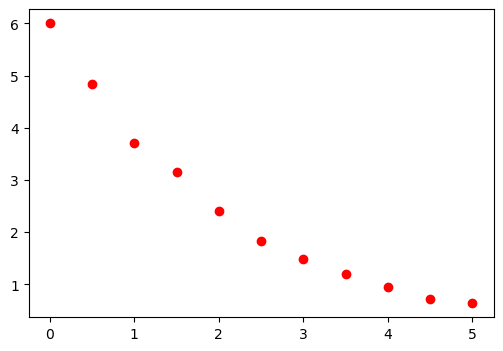

In [22]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
ax.plot(x, y,'ro')
plt.show()

In the following code cells use `P.polyfit(x, y, order)` to create three polynomial arrays named `f1`, `f2`, and `f3` that are the first, second, and third order fit polynomials for the previous $x$ and $y$ points.

In [23]:
# first order polynomial fit assigned to `f1`
f1 = P.polyfit(x, y, 1)

In [24]:
# second order polynomial fit assigned to `f2`
f2 = P.polyfit(x, y, 2)

In [25]:
# third order polynomial fit assigned to `f3`
f3 = P.polyfit(x, y, 3)

Now create fitted $y$-value arrays from each of the above polynomials via `P.polyval(xrange, fitted_poly)`. Pass a linearly spaced array with the same range as the original $x$-value range to the `P.polyval()` function. This array can have more points than the original, such as `x_vals` in the first code cell below. Also pass the desired fitted polynomial (`f1`, `f2`, or `f3`) to the `P.polyval()` function. Create `y1`, `y2`, and `y3` arrays using `P.polyval()` with `x_vals` and the `f1`, `f2`, and `f3` polynomials in the following cells.

In [26]:
x_vals = np.linspace(0, 5, 100)

In [27]:
# create y1 using f1 and x_vals
y1 = P.polyval(x_vals, f1)

In [28]:
# create y2 using f2 and x_vals
y2 = P.polyval(x_vals, f2)

In [29]:
# create y3 using f3 and x_vals
y3 = P.polyval(x_vals, f3)

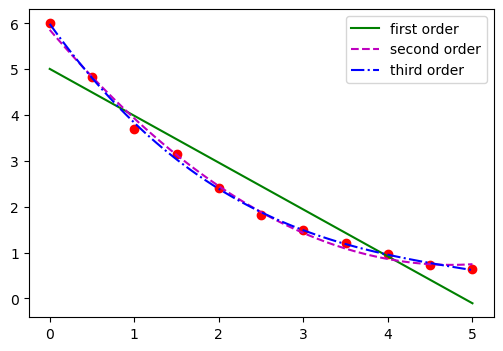

In [32]:
# plot the original points and the 3 fitted curves
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
ax.plot(x, y, 'ro')
ax.plot(x_vals, y1, 'g-', label='first order')
ax.plot(x_vals, y2, 'm--', label='second order')
ax.plot(x_vals, y3, 'b-.', label='third order')
ax.legend()
plt.show()

Execute the next two code cells to perform a regression. Notice that the highest $R^2$ value results from the third order fit; meaning that it is the best fit of the three.

In [33]:
from scipy import stats
m1, b1, r1, p1, s1 = stats.linregress(y, P.polyval(x, f1))
m2, b2, r2, p2, s3 = stats.linregress(y, P.polyval(x, f2))
m3, b3, r3, p3, s3 = stats.linregress(y, P.polyval(x, f3))

In [34]:
print(r1**2)
print(r2**2)
print(r3**2)

0.9087368089354221
0.9963022791734456
0.9988036096919305


**Finding zeros (roots) and local minimums and maximums of polynomials**

Find the roots for the polynomial $5 + 7x -8x^2 -2x^3$ using `P.polyroots(p)` and the local minimums and maximums using the roots of the derivative. Plot the polynomial as a curve and roots and minimums/maximums as points.

In [35]:
# create the polynomial 'c'
c = [5, 7, -8, -2]

In [36]:
# find the roots of 'c' and assign to the variable 'r'
r = P.polyroots(c)

In [37]:
print("roots =", r)

roots = [-4.63837413 -0.48135172  1.11972585]


In [38]:
x = np.linspace(-6, 3, 100)  # range of x-values using linspace
y = P.polyval(x, c)          # array 'y' using 'x' and 'c'
rz = np.zeros(len(r))        # array of zeros for each of the roots (for plotting)

yd = P.polyval(x, P.polyder(c))   # y-values of the derivative of the polynomial
mmx = P.polyroots(P.polyder(c))   # x-location of the roots of the derivative

# local min/max values occur where the derivative is zero; at the roots
# of the derivative
mmy = P.polyval(mmx, c)           # y-values of the local min/max values

print(f"local minimums/maximums of {mmy} at x = {mmx}")

local minimums/maximums of [-34.02475546   6.39512583] at x = [-3.04927169  0.38260502]


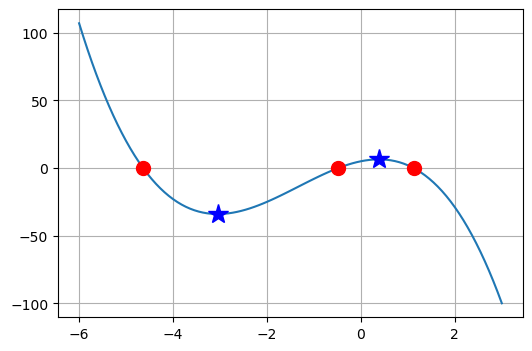

In [46]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
ax.plot(x, y)
ax.plot(r, rz, 'ro', ms=10)      # roots are red circles
ax.plot(mmx, mmy, 'b*', ms=15)   # max/min are blue stars
ax.grid()
plt.show()

See if the results are any different using `np.roots()` after executing the following code cell.

In [37]:
# np.roots() requires the polynomial start with largest order of x
np.roots(c[::-1])

array([-4.63837413,  1.11972585, -0.48135172])

**Creating user defined functions**

Create the user defined function `cbrt(x)` that solves for the cube root of a numeric value.


In [38]:
# define the function here
def cbrt(x):
    if x >= 0:
        # return a positive number, round to 12 places
        return round(x**(1/3), 12)
    else:
        # return a negative number, round to 12 places
        return round(-abs(x**(1/3)), 12)

Test your `cbrt()` function with the values of $125$, $27$, and $-27$.

In [39]:
# test with 125 (should get 5)
cbrt(125)

5.0

In [40]:
# test with 27 (should get 3)
cbrt(27)

3.0

In [41]:
# test with -27 (should get -3)
cbrt(-27)

-3.0

**Creating anonymous functions**

Execute the following code cell to create an anonymous function named `FA`. Then use the next code cells to call the function with values of $2$ and $10$; i.e. `FA(2)`.

In [42]:
FA = lambda x: 8*x + 5

In [43]:
# call FA with 2
FA(2)

21

In [44]:
# call FA with 10
FA(10)

85

*Note*: it is not considered very Pythonic to name an anonymous function even though it is possible and easy to do. Instead, they are expected to be defined and called within other functions.

Try another one. Name the anonymous function `circum` and use the argument variable `d` (like `x` in the previous example) and include the expression to calculate the circumference of a circle from its diameter `d`. Use `np.pi` instead of `math.pi`.

Test the function with the following values:
- $2$
- $5$
- an array created using `np.arange(1, 5)`

In [45]:
# define the lambda function to calculate circumference from diameter
circum = lambda d: np.pi * d

In [46]:
# test with 2
circum(2)

6.283185307179586

In [47]:
# test with 5
circum(5)

15.707963267948966

In [48]:
# test with 1, 2, 3, 4 using a numpy arange
circum(np.arange(1, 5))

array([ 3.14159265,  6.28318531,  9.42477796, 12.56637061])

Let's try one with mulitple arguments. This function, `line`, returns the $y$-value of a point on a line that has a slope of `m` at a particular `x` position and with a $y$ intercept of `b`. Notice that to use multiple arguments you just need to separate the argument names with commas after the `lambda` command and before the colon.

Test the function with arguments of `(4, 2, 0)` and `(8, 10, 5)`.

In [54]:
line = lambda m, x, b: m*x + b

In [55]:
# test with the arguments (4, 2, 0)
line(4, 2, 0)

8

In [56]:
# test with the arguments (8, 10, 5)
line(8, 10, 5)

85

**Finding zeros (roots) of functions**

1. Define a function
2. Plot the function over the desired range
3. Find zeros using `optimize.fsolve()` with guesses based on the plot

Define an anonymous function and plot it over the range $0$ to $5$.

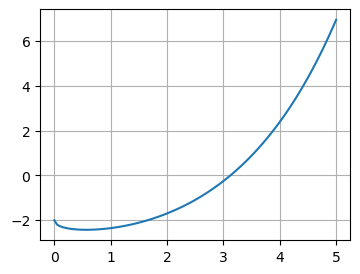

In [60]:
g = lambda x: np.exp(0.5*x) - np.sqrt(x) - 3
x = np.linspace(0, 5, 100)
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
ax.plot(x, g(x))
ax.grid(True)
plt.show()

Use `optimize.fsolve()` with two arguments; the function `g` and a guess of 1. Assign the zero to a variable and print it using the provided statement.

In [61]:
# add arguments to the fsolve() function
local_zero = optimize.fsolve(g, 1)
print(f'Local zero at: {local_zero}')

Local zero at: [3.12358862]


**Another example**

Define $F(x) = x^3 - 8x^2 + 17x + \sqrt{x} - 10$ with an anonymous function. Notice that this is not a polynomial (see the square root symbol).

In [ ]:
F = lambda x: x**3 - 8*x**2 + 17*x + np.sqrt(x) - 10

Plot it over a range of $x = 0$ to $5$ (use `np.linspace()` with 100 values).

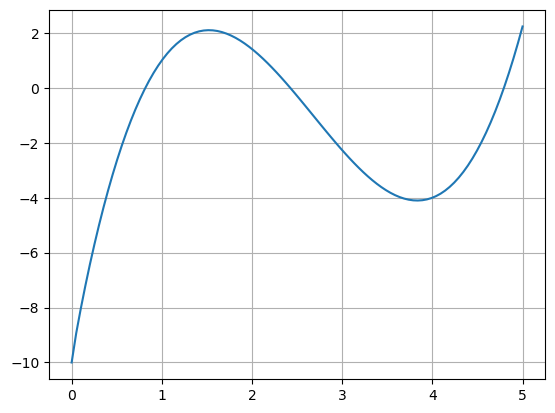

In [62]:
x = np.linspace(0, 5, 100)
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x, F(x))
ax.grid()
plt.show()

Looking at the plot, you should see three zero crossings. Use `optimize.fsolve()` with estimates of 1, 2.5, and 4.5 in a list to find the locations of the zeros. Use a print statement to display all of the zeros.

In [71]:
z = optimize.fsolve(F, [1, 2.5, 4.5])
print(f"Zeros (roots) are located at {z}")

Zeros (roots) are located at [0.81726117 2.42441531 4.79338415]


**Find local minimums (and maximums) of functions**

1. Define and plot a function
2. Use `optimize.fminbound()` with the defined function to find the x-location of a local minimum
3. Negate the original function
4. Use `optimize.fminbound()` with the negated function to find the x-location of a local maximum
5. Pass results to the original function to get the y-values

Use `optimize.fminbound()` with bounds of $2$ to $5$ to find the location of the local mimimum of $F(x)$. Then pass the result to `F(x)` to find the $y$-value.

In [76]:
# find the location of the local minimum of 'F' between 2 and 5 and assign the result
# to the variable 'ymin_loc' and print it
ymin_loc = optimize.fminbound(F, 2, 5)
print(ymin_loc)

3.832561304794867


In [77]:
# find the value of the local minimum and assign to the variable 'ymin_val' and print it
ymin_val = F(ymin_loc)
print(ymin_val)

-4.102297239895825


Create a new function `Fneg` that is the negative of `F`. Then use bounds of 0 to 2 to find the location of the local maximum using `optimize.fminbound()` with `Fneg`. Pass this result to `F(x)` to find the $y$-value of the local maximum.

In [79]:
# create 'Fneg' as a lambda function that calls the negative of 'F' 
Fneg = lambda x: -F(x)

In [80]:
# find the location of the local maximum using 'Fneg' between 0 and 2 and assign the
# result to the variable 'ymax_loc' and print it
ymax_loc = optimize.fminbound(Fneg, 0, 2)
print(ymax_loc)

1.5223918333234032


In [81]:
# find the value of the local maximum and assign to the variable 'ymax_val' and print it
ymax_val = F(ymax_loc)
print(ymax_val)

2.1015108249034444


Print the locations and values of the local minimum and maximum.

In [69]:
# print the results
print(f"Local minimum at ({ymin_loc:f}, {ymin_val:f})")
print(f"Local maximum at ({ymax_loc:f}, {ymax_val:f})")

Local minimum at (3.832561, -4.102297)
Local maximum at (1.522392, 2.101511)


**Numerical integration using `integrate.quad()`**

Create the function `g`. Use  `integrate.quad(func, lower, upper)` to perform numerical integration on the defined function between 1 and 6.

$g(x) = \displaystyle\frac{2x^2}{\sqrt{1 + x}}$

In [71]:
g = lambda x: 2*x**2/np.sqrt(1 + x)

In [72]:
# use integrate.quad() between 1 and 6
integrate.quad(g, 1, 6)

(62.26923351502151, 6.913273677413735e-13)

Define an anonymous function $\displaystyle f(x) = 2\sqrt{1+\frac{4h^2x^2}{a^4}}$ and assign $a=80$ and $h=18$. Then use `integrate.quad()` to integrate the function between $0$ and $a$.

In [72]:
# define the lambda function f
f = lambda x: 2*np.sqrt(1 + 4*h**2*x**2/a**4)

In [73]:
# assign 80 to a and 18 to h
a = 80
h = 18

In [74]:
# integrate between 0 and a
integrate.quad(f, 0, a)

(165.24678992704355, 1.8346079092240013e-12)

Integrate $\displaystyle h(x) = \frac{e^{2x}}{x}$ between $1$ and $2$ using `integrate.quad()`. This time don't create an anonymous function first, just put the `lambda` expression directly into the `integrate.quad()` function.

In [76]:
integrate.quad(lambda x: np.exp(2*x)/x, 1, 2)

(14.676640114054331, 1.62943437787603e-13)

**Integration using `trapz(y, x)`**

Create an array $t$ that starts with 0 and ends with 7 with steps of 1 using `np.arange()`. Also create an array $v$ with the following values [0, 14, 39, 69, 95, 114, 129, 139] multiplied by 5280/3600. Create a $t,v$ plot of the data points then use both `np.trapz()` and `integrate.trapz()` to find the area under the curve. Did the two functions provide the same results?

In [83]:
# create t
t = np.arange(0, 8)

In [84]:
# create v
v = np.array([0, 14, 39, 69, 95, 114, 129, 139])*5280/3600

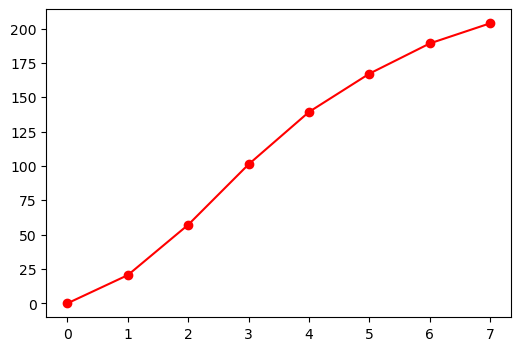

In [85]:
# plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(t, v, "-ro")
plt.show()

In [86]:
# np.trapz()
np.trapz(v, t)

776.5999999999999

In [87]:
# integrate.trapz()
integrate.trapz(v, t)

776.5999999999999

**Numerical differentiation using `scipy.misc.derivative()`**

From `scipy.misc` import the `derivative` function. Create an anonymous function $h(x) = x\cos(x)$. Then find the first derivative at x = 0, $\pi/4$, $\pi/3$, $\pi/2$, and $\pi$ in individual code cells. Use a spacing (`dx`) of $1\times10^{-6}$; i.e. `dx=1e-6`. In the last code cell find the first derivative at all five values by passing an array (not a list) as the second argument.

In [88]:
from scipy.misc import derivative

In [89]:
# define function h
h = lambda x: x*np.cos(x)

In [90]:
# first derivative at 0
derivative(h, 0, dx=1e-6)

0.9999999999995001

In [91]:
# first derivative at pi/4
derivative(h, np.pi/4, dx=1e-6)

0.15174641393445043

In [92]:
# first derivative at pi/3
derivative(h, np.pi/3, dx=1e-6)

-0.4068996821149362

In [93]:
# first derivative at pi/2
derivative(h, np.pi/2, dx=1e-6)

-1.5707963266654104

In [94]:
# first derivative at pi
derivative(h, np.pi, dx=1e-6)

-1.000000000139778

In [95]:
# first derivative at all 5 locations using an array
derivative(h, np.array([0, np.pi/4, np.pi/3, np.pi/2, np.pi]), dx=1e-6)

array([ 1.        ,  0.15174641, -0.40689968, -1.57079633, -1.        ])

Create an anonymous function $f(x) = \sin(x)$ and an array named `x` of 100 $x$-values from $0$ to $2\pi$. Find the derivative of $f$ at `x` with `dx=1e-6` and `n=1` and assign the results to the name `df`. Then plot `x, f(x)` (the original function $f$) and `x, df` (the derivative of $f$). Make the original a solid red line and the derivative a dashed blue line. Add a legend to the plot before showing it.

In [96]:
# define f
f = lambda x: np.sin(x)

In [97]:
# create x
x = np.linspace(0, 2*np.pi, 100)

In [98]:
# find derivative and name it df
df = derivative(f, x, dx=1e-6, n=1)

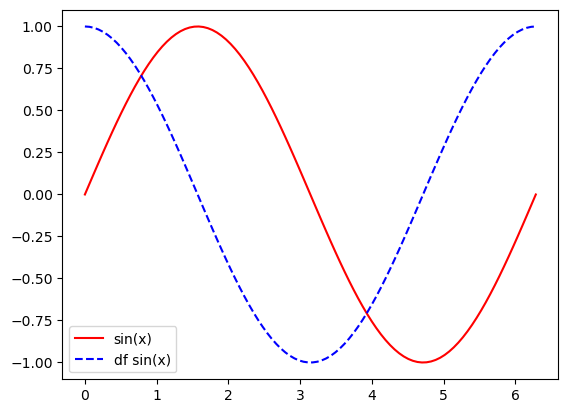

In [99]:
# plot 'x, f(x)' and 'x, df'
fig, ax = plt.subplots()
ax.plot(x, f(x), '-r', label="sin(x)")
ax.plot(x, df, '--b', label="df sin(x)")
ax.legend()
plt.show()

**Wrap it up**

Click on the **Save** button and then the **Close and halt** button when you are done before closing the tab.